In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics

In [3]:
#Reading the dataset voice.csv

data = pd.read_csv("voiceDataSet.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
#To check the distribution of male and female across all the attributes

data.groupby("label").count()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label,,,,,,,,,,,,,,,,,,,,
female,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584
male,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584


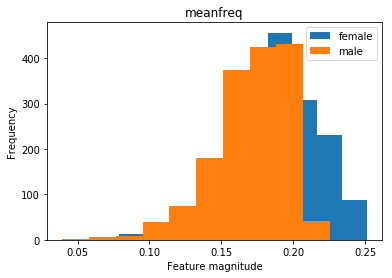

1


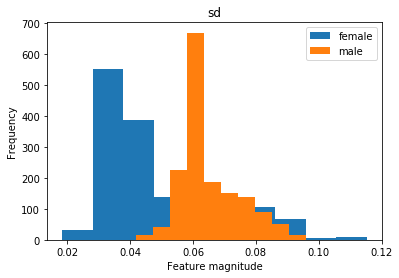

2


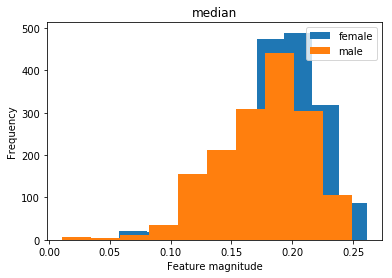

3


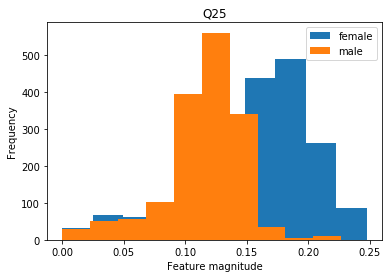

4


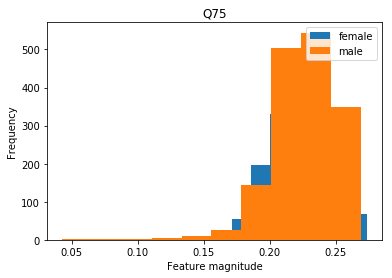

5


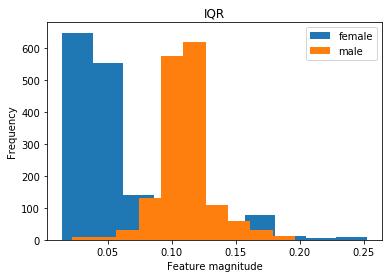

6


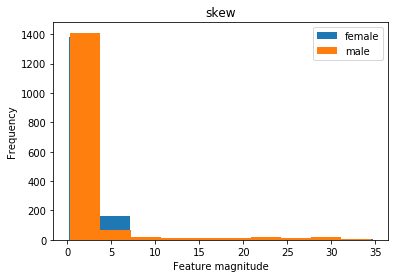

7


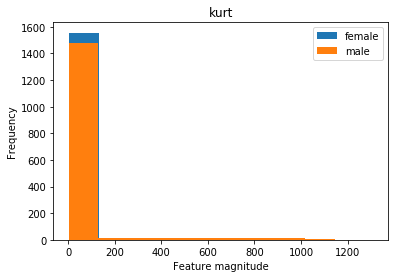

8


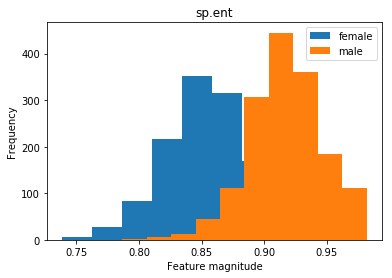

9


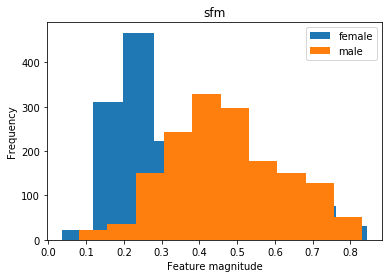

10


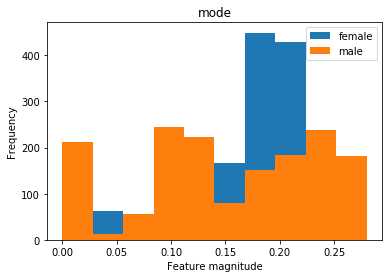

11


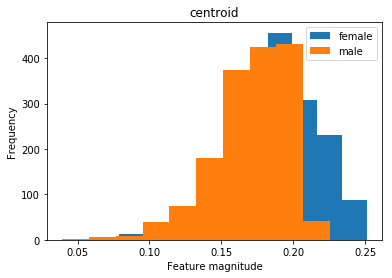

12


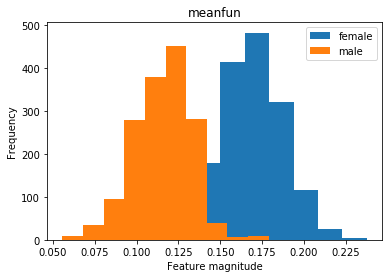

13


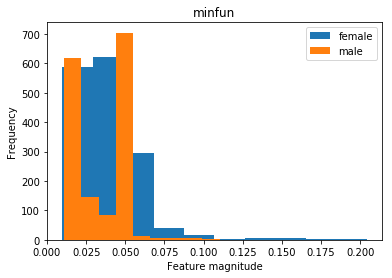

14


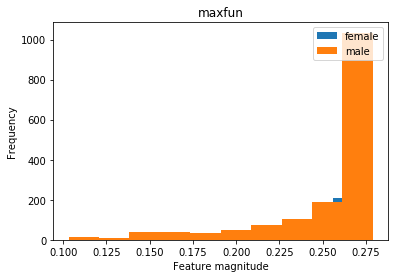

15


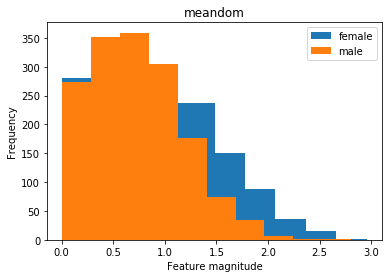

16


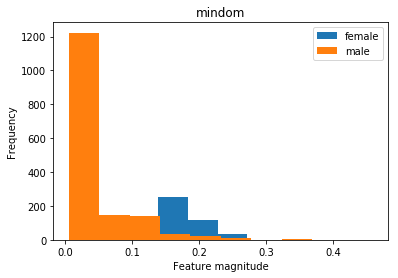

17


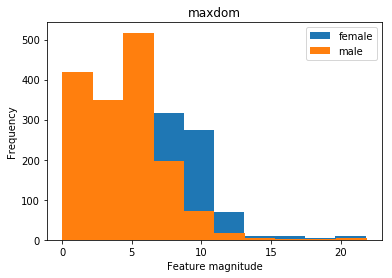

18


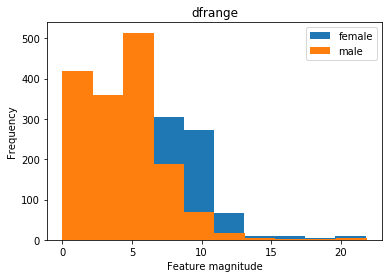

19


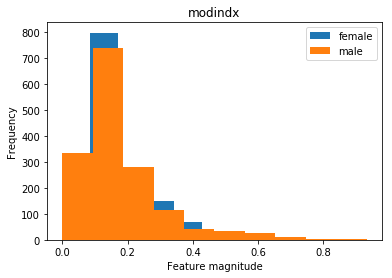

20


In [5]:
#Check the distribution of male and female in each feature columns
i=0
for col in data.columns:
    if i>=20:
        break
    plt.hist(data.loc[data['label'] == "female", col],label="female")
    plt.hist(data.loc[data['label'] == "male", col],label="male")
    plt.title(col)
    plt.xlabel("Feature magnitude")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()
    i+=1
    print(i)

In [6]:
#Encoding the label column. Female to 0 and male to 1

class_mapping = {label: idx for idx, label in enumerate(np.unique(data['label']))}
class_mapping

{'female': 0, 'male': 1}

In [7]:
# Converting class labels from strings to integers

data['label'] = data['label'].map(class_mapping)


In [8]:
#Creating X,y and splitting the dataset into training and testing

from sklearn.model_selection import train_test_split

X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [9]:
#Scaling the features

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [10]:
#Train logistic regression model

logit = LogisticRegression()
logit.fit(X_train_std, y_train)

print("Logistic Regression")
print("Accuracy on training set: {:.3f}".format(logit.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(logit.score(X_test_std, y_test)))

y_pred_logit = logit.predict(X_test_std)
print("Predicted value: ",y_pred_logit)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_logit, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)


Logistic Regression
Accuracy on training set: 0.978
Accuracy on test set: 0.965
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1

c:\python37-23\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
#Train decision tree model


tree = DecisionTreeClassifier(random_state=0,max_depth=4)
tree.fit(X_train_std, y_train)

print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_std, y_test)))

y_pred_tree = tree.predict(X_test_std)
print("Predicted value: ",y_pred_tree)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_tree, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Decision Tree
Accuracy on training set: 0.983
Accuracy on test set: 0.961
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0
 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1 0 0 1

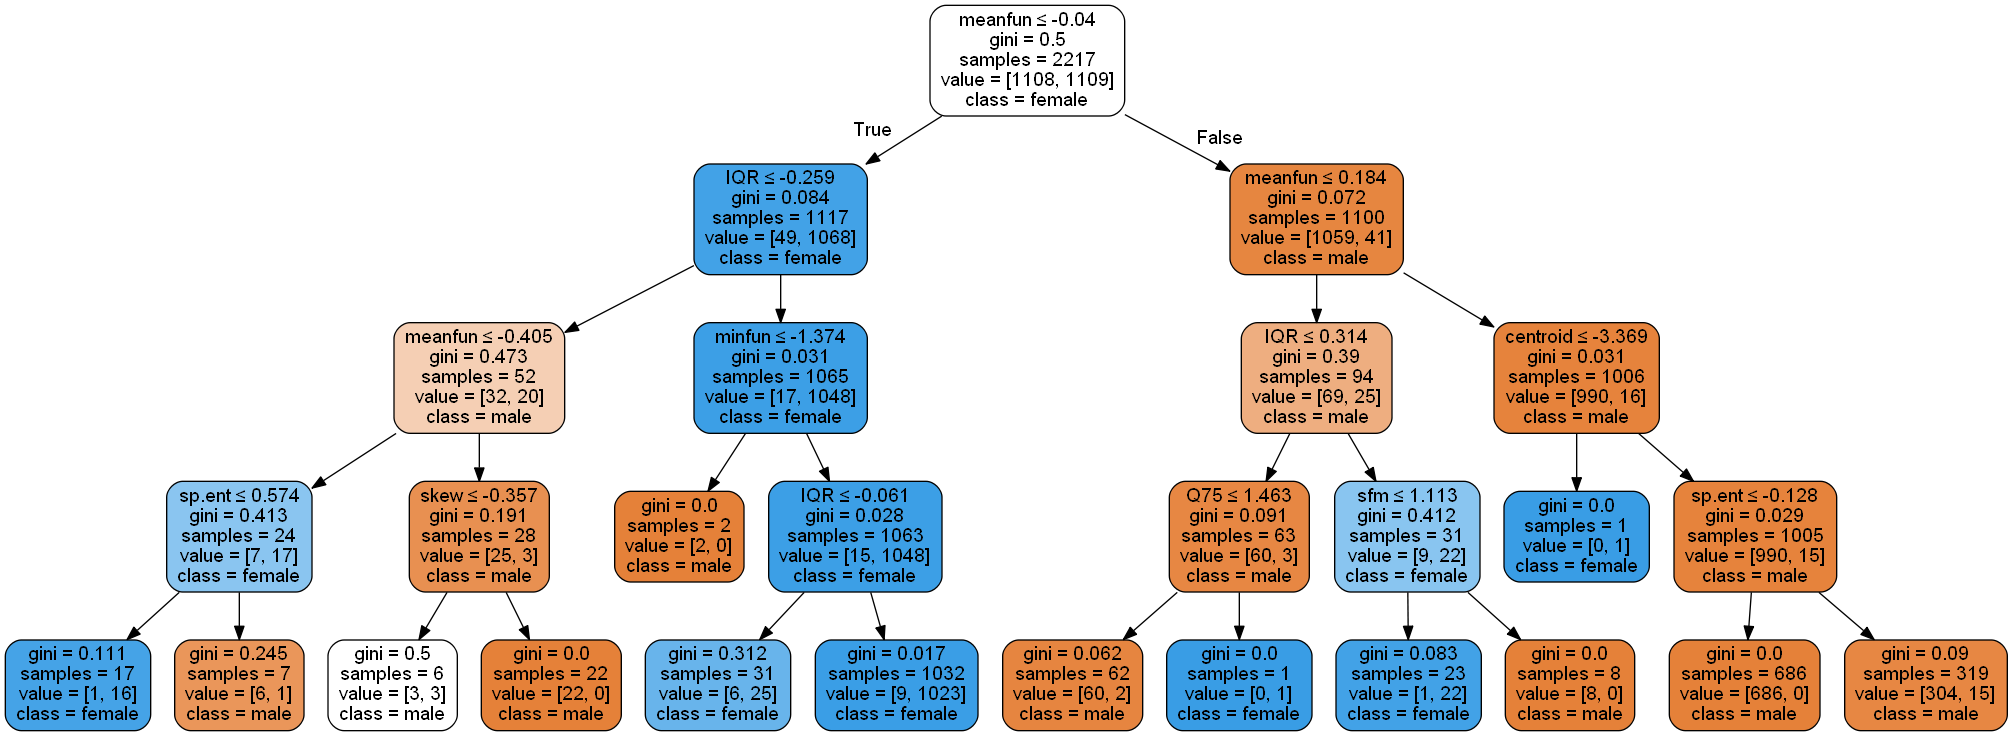

In [22]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                feature_names = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
                ,class_names = ['male','female'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [23]:
#Train random forest model

forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train_std, y_train)

print("Random Forest")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test_std, y_test)))

y_pred_forest = forest.predict(X_test_std)
print("Predicted value: ",y_pred_forest)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_forest, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)

Random Forest
Accuracy on training set: 1.000
Accuracy on test set: 0.965
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0
 1 0 0 1

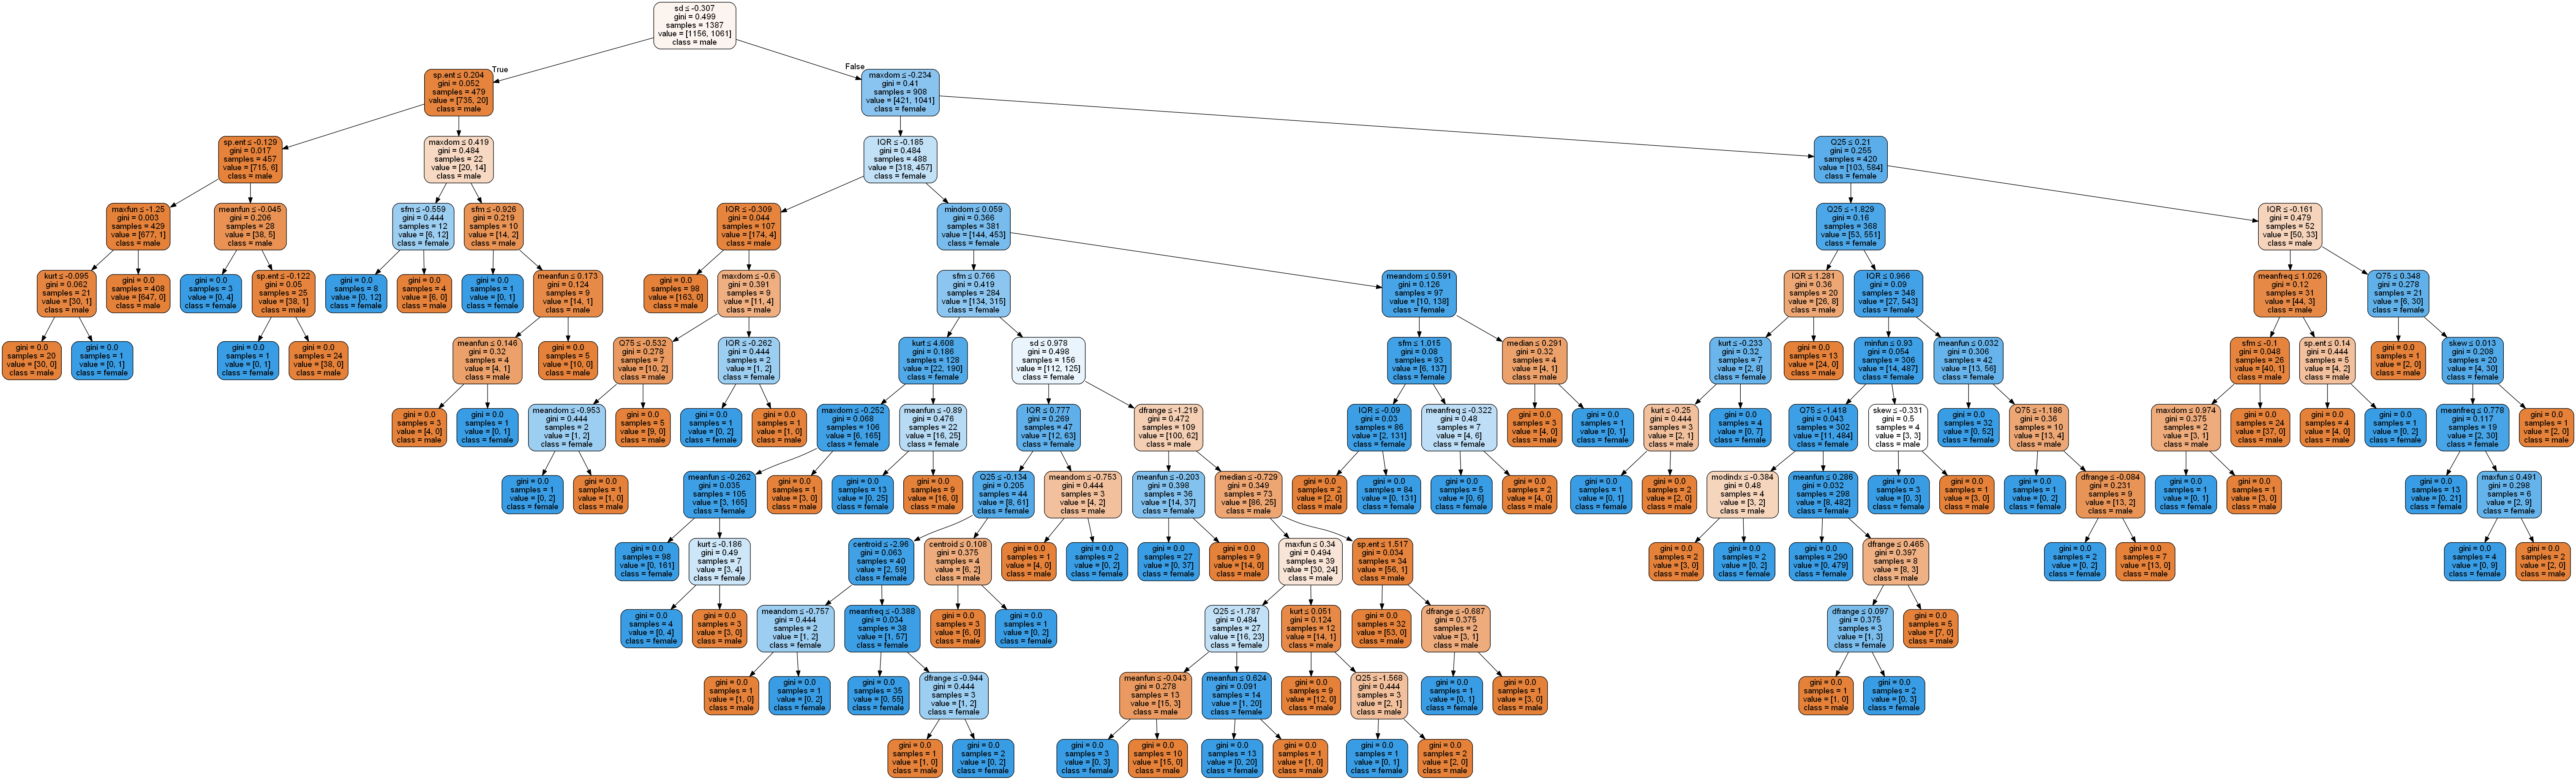

In [31]:
# for i in range(5):
stree = forest.estimators_[2]
dot_data = StringIO()
export_graphviz(stree, out_file=dot_data,
                feature_names = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
                ,class_names = ['male','female'],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [48]:
#Train support vector machine model
#Running SVM with default hyperparameter
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’)
svm = SVC(kernel="rbf")
svm.fit(X_train_std, y_train)

print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test_std, y_test)))

y_pred_sm = svm.predict(X_test_std)
print("Predicted value: ",y_pred_sm)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_sm, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_sm))

Support Vector Machine
Accuracy on training set: 0.989
Accuracy on test set: 0.974
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0

In [49]:
svm1 = SVC(kernel='poly',C=0.9,degree=3,gamma=0.05)
# svm1 = SVC(kernel='linear',C=0.9,gamma=0.05)
svm1.fit(X_train_std, y_train)

print("Support Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm1.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(svm1.score(X_test_std, y_test)))

y_pred_sm = svm1.predict(X_test_std)
print("Predicted value: ",y_pred_sm)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_sm, average='micro')
print("Precision, Recall and fscore:",precision, recall, fscore,)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred_sm))

Support Vector Machine
Accuracy on training set: 0.965
Accuracy on test set: 0.961
Predicted value:  [1 1 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0
 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0
 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1
 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0

In [37]:
#linear kernel
svc=SVC(kernel='linear')
svc.fit(X_train_std,y_train)
y_pred=svc.predict(X_test_std)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.964248159831756


In [38]:
# rbf kernel
rbf=SVC(kernel='rbf')
rbf.fit(X_train_std,y_train)
y_pred=rbf.predict(X_test_std)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9737118822292324


In [39]:
# polynomial kernel
poly=SVC(kernel='poly')
poly.fit(X_train_std,y_train)
y_pred=svc.predict(X_test_std)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.964248159831756


In [40]:
#Plot the graph for feature selection for decision tree and random forest
def plot_feature_importances_mydata(model):
    n_features = X_train_std.shape[1]
    plt.figure(figsize=(8,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(data))
    plt.title("Feature Selection")
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variable")
    plt.show()

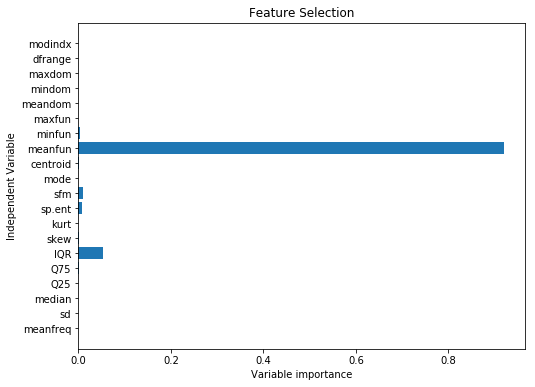

In [41]:
plot_feature_importances_mydata(tree)

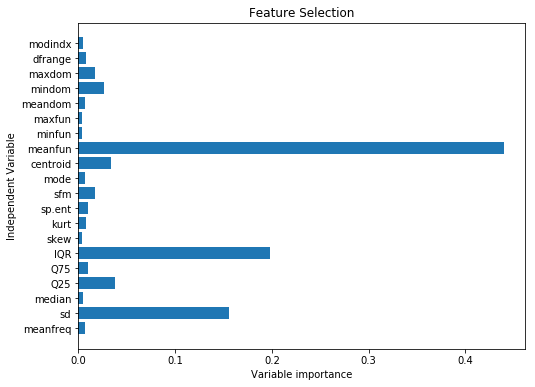

In [42]:
plot_feature_importances_mydata(forest)


In [47]:
#Read the file which got generated using our voice samples and using code written in R.

data_new = pd.read_csv("voiceSamples.csv")
data_new.head()


#Creating X and Y
X1, y1 = data_new.iloc[:, :-1].values, data_new.iloc[:, -1].values
y1

#standardizing the features
stdsc = StandardScaler()
X1_std = stdsc.fit_transform(X1)

#Predicting the target variable using Logistic, Decision Tree , Random Forest, SVM
y1_pred_logit = logit.predict(X1_std)
y1_pred_tree = tree.predict(X1_std)
y1_pred_forest = forest.predict(X1_std)
y1_pred_svm = svm.predict(X1_std)
y1_pred_svm_poly = svm1.predict(X1_std)


print("Logistic Regression: ",y1_pred_logit)
print("TRee",y1_pred_tree)
print("Random Forest: ",y1_pred_forest)
print("SVM Rbf: ",y1_pred_svm)
print("SVM Poly overfitting: ",y1_pred_svm_poly)

Logistic Regression:  [1 1 1 0 0 0 0 0 0 0 0]
TRee [1 1 1 0 0 1 0 0 0 0 0]
Random Forest:  [1 1 1 0 0 0 0 0 0 0 0]
SVM Rbf:  [1 1 1 0 0 0 0 0 0 0 0]
SVM Poly overfitting:  [1 1 1 0 0 0 0 0 0 0 0]


In [21]:
testData = pd.read_csv("voicee.csv")
testData.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.208423,0.035316,0.214153,0.189936,0.237970,0.048034,2.171442,8.023320,0.871488,0.179114,...,0.208423,0.181807,0.052878,0.277358,0.423999,0,0.775195,0.775195,0.078829,male
1,0.206191,0.073856,0.230640,0.186075,0.265263,0.079188,3.885080,23.096816,0.910442,0.534641,...,0.206191,0.184433,0.043448,0.279114,0.399066,0,4.155908,4.155908,0.056558,female
2,0.137954,0.081126,0.129572,0.069963,0.210777,0.140814,0.844138,4.375004,0.982612,0.857724,...,0.137954,0.172882,0.043151,0.279114,0.624463,0,10.723535,10.723535,0.028576,female
3,0.210883,0.054838,0.221612,0.207547,0.239766,0.032220,3.657245,19.426866,0.862886,0.342495,...,0.210883,0.167453,0.043151,0.279114,0.668951,0,12.338525,12.338525,0.038796,female


In [44]:

data_new = pd.read_csv("voicee.csv")
data_new.head()


#Creating X and Y
X1, y1 = data_new.iloc[:, :-1].values, data_new.iloc[:, -1].values
y1

#standardizing the features
stdsc = StandardScaler()
X1_std = stdsc.fit_transform(X1)

#Predicting the target variable using Logistic, Decision Tree , Random Forest, SVM
y1_pred_logit = logit.predict(X1_std)
y1_pred_tree = tree.predict(X1_std)
y1_pred_forest = forest.predict(X1_std)
y1_pred_svm = svm.predict(X1_std)
y1_pred_svm1 = svm1.predict(X1_std)


print("Logistic Regression: ",y1_pred_logit)
print("TRee",y1_pred_tree)
print("Random Forest: ",y1_pred_forest)
print("SVM: ",y1_pred_svm)
print("SVM poly: ",y1_pred_svm1)

Logistic Regression:  [0 0 1 1]
TRee [0 0 1 1]
Random Forest:  [0 0 1 0]
SVM:  [0 0 1 1]
SVM poly:  [0 0 1 1]


In [23]:
from playsound import playsound

In [24]:
import sounddevice as sd

In [25]:
from scipy.io.wavfile import write

In [ ]:
fs = 44100
seconds = 5

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()
write('Male/output.wav', fs, myrecording)

In [ ]:
fs = 44100
seconds = 5

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()
write('Female/output.wav', fs, myrecording)